<h1>Table of Contents (Clickable in sidebar)<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Balancing-Statistical-confidence--with-model-simplicity" data-toc-modified-id="Balancing-Statistical-confidence--with-model-simplicity-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Balancing Statistical confidence  with model simplicity</a></span></li><li><span><a href="#Processing-predictor-data" data-toc-modified-id="Processing-predictor-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Processing predictor data</a></span><ul class="toc-item"><li><span><a href="#Image-below-shows-download-control-panel" data-toc-modified-id="Image-below-shows-download-control-panel-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Image below shows download control panel</a></span></li><li><span><a href="#Basic-code-is-explained-line-by-line-below" data-toc-modified-id="Basic-code-is-explained-line-by-line-below-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Basic code is explained line by line below</a></span></li></ul></li><li><span><a href="#The-revised-research-question" data-toc-modified-id="The-revised-research-question-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>The revised research question</a></span></li><li><span><a href="#Libraries,---modules-and-orientation" data-toc-modified-id="Libraries,---modules-and-orientation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Libraries,   modules and orientation</a></span></li><li><span><a href="#Functions-Section" data-toc-modified-id="Functions-Section-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Functions Section</a></span><ul class="toc-item"><li><span><a href="#Title-function" data-toc-modified-id="Title-function-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Title function</a></span></li><li><span><a href="#The-clean-function-creates-multiple-single-variable--files-acts-onexpansive-source-files" data-toc-modified-id="The-clean-function-creates-multiple-single-variable--files-acts-onexpansive-source-files-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>The clean function creates multiple single variable  files acts onexpansive source files</a></span></li><li><span><a href="#Rationale-for-data-frame-reductions--and-other-EDA-decisions" data-toc-modified-id="Rationale-for-data-frame-reductions--and-other-EDA-decisions-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Rationale for data frame reductions  and other EDA decisions</a></span></li></ul></li><li><span><a href="#Corr_matrix" data-toc-modified-id="Corr_matrix-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Corr_matrix</a></span><ul class="toc-item"><li><span><a href="#Taking-Stock!" data-toc-modified-id="Taking-Stock!-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Taking Stock!</a></span><ul class="toc-item"><li><span><a href="#We-kept" data-toc-modified-id="We-kept-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>We kept</a></span></li><li><span><a href="#Nutrients" data-toc-modified-id="Nutrients-6.1.2"><span class="toc-item-num">6.1.2&nbsp;&nbsp;</span>Nutrients</a></span></li><li><span><a href="#Further-variables-below" data-toc-modified-id="Further-variables-below-6.1.3"><span class="toc-item-num">6.1.3&nbsp;&nbsp;</span>Further variables below</a></span></li></ul></li></ul></li></ul></div>

##  Balancing Statistical confidence  with model simplicity

- Narrowing Countries, Time and Indepentant Variables gives a simple model with no missing values 
- Sample size: Reducing sample size  increases  the confidence.
- The sample size can still be  sufficient to provide reliable results.
- An acceptable  margin of error will be decided upon context later.
- A significance level of .05 is the aim.
- Confidence level of  95%
- Model complexity: By using simpler models with fewer parameters, the predictions may be more focused and easier to interpret 
- We will prepare a wide range of data but agressively jettison most of it during pre-processing
- Variable selection: Choosing the most relevant variables will be based on correlation
- Data quality is assured bu only using official figures
- Using the 'nutrient.csv' data to  narrow  range of data

## Processing predictor data
### Image below shows download control panel
- db [https://www.fao.org/faostat/en/#data/domains_table](https://www.fao.org/faostat/en/#data/domains_table) /Land, Inputs and Sustainability/Inputs/ Fertilizers by Nutrient
- The  image below demonstrates retrieval settings for 'Fertilizers by Nutrient' database was 
- European Union (27) > (List) 
- >1999 as per revised research question
- All 'Items' and All 'Elemement' selected for later grouping
![image1](images/beef002.png)

### Basic code is explained line by line below

# Data Wrangling   for Irish Beef 

## The revised research question
How has Ireland's beef sector performed compared to the EU 27 countries since 2000, and can we forecast future prices using this historical data? Additionally, what can we learn from sentiment analysis of the beef industry during this time period? By focusing on data from 2000 onwards, we can better capture the current state of the beef industry and make more relevant predictions about future trends. 
## Libraries,   modules and orientation

In [633]:

### Data Manipulation and Analysis
import csv
import pandas as pd
import numpy as np
import fancyimpute
import missingno as msno
from functools import partial, reduce
### Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.image as mpimg
### Statistical Analysis
from scipy.stats import ks_2samp, shapiro
### Machine Learning
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
### Text Processing
import html
import re
import inflection
import missingno as msno
### Country Information
from countryinfo import CountryInfo
import pycountry
from countrygroups import EUROPEAN_UNION
### File System and OS
import glob
import os
from IPython.display import display, HTML
### Date and Time
import datetime
import time
### Data Presentation
from tabulate import tabulate
from IPython.display import HTML, Image, display

### Data Types
from typing import Dict, List, Tuple
import warnings

# Filter out the FutureWarning with the level keyword
# warnings.filterwarnings('ignore', message='Using the level keyword in DataFrame and Series aggregations is deprecated')

# Reset the warning filter to default
# warnings.filterwarnings('default')



## Functions Section

In order to tidy up the layout and reading and due to the logical nature of functions we collect them here rather than leave them scattered throughout the notepad.

"""

### Title function
The 'title' naming convention is where each word starts
with a capital letter, except for prepositions and conjunctions, which start with a lowercase letter. 
 The function takes a string as input and converts it to title case, 
where the first letter of each non-conjunction/preposition word is capitalized, 
and all other letters are lowercase.
It achieves this by splitting the input string into a list of words, -->
identifying which words are prepositions or conjunctions based on a predefined list, 
nd then capitalizing the first letter of all other words while converting prepositions 
nd conjunctions to lowercase. The resulting list of processed words is then joined back into a
single string with proper spacing and returned.

"""

In [634]:

def title(sentence):
    """
    Takes a string and converts it to title case, where the first letter of each
    non-conjunction/preposition word is capitalized, and all other letters are lowercase.
    
    Args:
        sentence (str): The string to convert to title case.
        
    Returns:
        str: The input string converted to title case.
    """
    # Define a list of common prepositions and conjunctions
    prepositions_conjunctions = ['a', 'this', 'an', 'the', 'and', 'but', 'or', 'for', 'has', 'nor', 'on', 'at', 'to', 'from', 'by', 'over', 'under', 'in', 'out', 'of']
    # Split the input string into a list of words
    words = sentence.split()
    processed_words = []
    for word in words:
        # If the word is not a preposition or conjunction, capitalize the first letter and lowercase the rest
        if word.lower() not in prepositions_conjunctions:
            processed_words.append(word.capitalize())
        # If the word is a preposition or conjunction, convert to lowercase
        else:
            processed_words.append(word.lower())
    # Join the list of processed words into a single string, with proper spacing
    output = " ".join(processed_words)
    # Remove any leading/trailing whitespace and add some padding
    return "     " + re.sub('\s+', ' ', output.strip()) + "     "



In [635]:

def snake(text, default='default'):
    """
    Converts a given string to snake_case by replacing any whitespace characters with underscores,
    converting to all lowercase, and removing any non-alphanumeric characters from the beginning and end.

    Parameters:
        text (str): The string to convert to snake_case.
        default (str): The default value to return if the input text is empty.

    Returns:
        str: The resulting string in snake_case format, or the default value if the input text is empty.
    """
    if not text:
        return default
    # Convert to string and replace any non-alphanumeric characters at the beginning and end with an empty string
    text = re.sub(r'^\W+|\W+$', '', str(text))
    # Replace any period symbols with underscores
    text = text.replace('.', '')
    # Replace any other non-alphanumeric characters with empty strings
    text = re.sub(r'\W+', '_', text)
    # Convert to all lowercase
    text = text.lower()
    return text

# Example usage:
text = "This is a text with pe,  ,  ,  ,riods. (And other characters   .)"
result = snake(text)
print(result)  # Output: "this_is_a_text_with_periods_and_other_characters"


this_is_a_text_with_pe_riods_and_other_characters


In [636]:
def clean(file_path):

    # Rename the 'Area' column to 'Country'
    df = df.rename(columns={'Area': 'Country'})
    df = df[df['Country'].isin(countries_to_keep)]
    
#     df = df[~df['Element'].isin(elements_to_drop)]
#     df = df[~df['Item'].isin(items_to_drop)]
    df = df[df['Year'] >= 2002]
    df = df[['Country', 'Year', 'Element', 'Item', 'Value']]

    # Filter for year >= 2002


    # Create a 'Key' column by concatenating 'Country' and 'Year'
    df['Key'] = df['Country'] + df['Year'].astype(str)

    # Convert values in the Item and Element columns to clean snake
    df['Item'] = df['Item'].apply(snake)
    df['Element'] = df['Element'].apply(snake)

    # Generate item and element lists
    item_df = df['Item'].unique()
    element_df = df['Element'].unique()

    # Create separate dataframes for each combination of Element and Item
    df_names = []
    combinations = df[['Element', 'Item']].drop_duplicates()
    for i, row in combinations.iterrows():
        # Get the current combination of Element and Item
        e = row['Element']
        it = row['Item']    
        # Create a DataFrame for the current combination
        df_name = f"{e}_{it}_df"
        globals()[df_name] = df[(df['Element'] == e) & (df['Item'] == it)].reset_index(drop=True)
        df_names.append(df_name)


    # Return the list of dataframe names
    return df_names


In [637]:
def cleanraw(df):
    # Rename the 'Area' column to 'Country'
    df = df.rename(columns={'Area': 'Country'})
    # Filter out specified countries and keep required columns
    countries_to_keep=['France','Germany','Ireland','Spain','Italy','Poland','Belgium']
    elements_to_drop
    df = df[df['Country'].isin(countries_to_keep)]
    df = df[['Country', 'Year', 'Element', 'Item', 'Value']]
    df['Key'] = df['Country'] + df['Year'].astype(str)
        # Convert values in the Item and Element columns to clean snake
    df['Item'] = df['Item'].apply(snake)
    df['Element'] = df['Element'].apply(snake)
    return df

"""
### The clean function creates multiple single variable  files acts onexpansive source files
-   Reads a CSV file located at file_path into a pandas DataFrame
-   Renames the column named 'Area' to 'Country' in the DataFrame
-   Filters out specified countries and retains only required columns
-   Filters for years greater than or equal to 2002
-   Creates a new column named 'Key' by concatenating the 'Country' and 'Year' columns
-   Converts values in the 'Item' and 'Element' columns to snake case
-   Generates unique lists of items and elements in the DataFrame
-   Creates separate DataFrames for each combination of element and item
-   Returns the final DataFrame
-   Specifically, the function performs the following steps

Regenerate response

"""

In [638]:
# Set up the filters based on  prior EDA decisions
#countries_to_keep=['France','Germany','Ireland','Spain','Italy','Poland','Belgium']
# elements_to_drop=['Production']
items_to_drop=['']
df = pd.read_csv('raw/nutrient.csv')
df = df.rename(columns={'Area': 'Country'})
# df = df[df['Country'].isin(countries_to_keep)]
df = df[df['Year'] >= 2002]
Unit_df=df['Unit'].unique()
df = df[['Country', 'Year', 'Element', 'Item', 'Value']]
df['Item'] = df['Item'].apply(snake)
df['Element'] = df['Element'].apply(snake)
item_df = df['Item'].unique()
element_df = df['Element'].unique()
print('Making sure all units are the same before dropping Unit columns.',Unit_df)
print(item_df)
print(element_df)
df.head()    

Making sure all units are the same before dropping Unit columns. [nan 'tonnes']
['nutrient_nitrogen_n_total' 'nutrient_phosphate_p2o5_total'
 'nutrient_potash_k2o_total']
['production' 'import_quantity' 'export_quantity' 'agricultural_use']


,Country,Year,Element,Item,Value
0,Austria,2002,production,nutrient_nitrogen_n_total,NaN
1,Austria,2003,production,nutrient_nitrogen_n_total,NaN
2,Austria,2004,production,nutrient_nitrogen_n_total,NaN
3,Austria,2005,production,nutrient_nitrogen_n_total,NaN
4,Austria,2006,production,nutrient_nitrogen_n_total,NaN


### Rationale for data frame reductions  and other EDA decisions


- Decision to drop 2000, 2001 and 2002 is based on heatmap below
- A visual inspection of missing data shows almost all countries in our sample have disproportionate levels of missing data in 2000 and 2001
- That is why 2000 and 2001 are cut

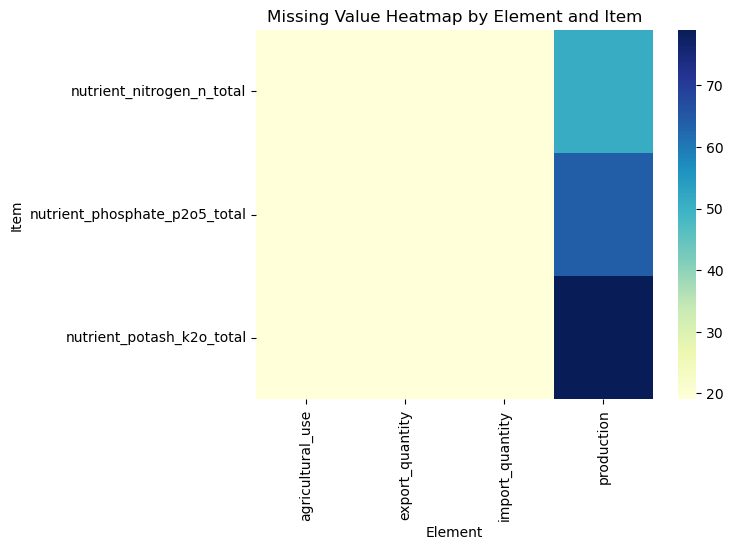

In [639]:


# create a pivot table with the Item as the index and Element as the columns
pivot_df = pd.pivot_table(df, index='Item', columns='Element', values='Value', aggfunc=lambda x: x.isnull().sum())

# create a heatmap with Element and Item
sns.heatmap(pivot_df, cmap='YlGnBu')
plt.title('Missing Value Heatmap by Element and Item')
plt.show()



In [640]:
# Set up the filters based on  prior EDA decisions
countries_to_keep=['France','Germany','Ireland','Spain','Italy','Poland','Belgium']
elements_to_drop=['Production']
items_to_drop=['']

df = pd.read_csv('raw/nutrient.csv')

In [641]:
df

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,RFN,Fertilizers by Nutrient,40,Austria,5510,Production,3102,Nutrient nitrogen N (total),2002,2002,NaN,NaN,NaN,NaN
1,RFN,Fertilizers by Nutrient,40,Austria,5510,Production,3102,Nutrient nitrogen N (total),2003,2003,NaN,NaN,NaN,NaN
2,RFN,Fertilizers by Nutrient,40,Austria,5510,Production,3102,Nutrient nitrogen N (total),2004,2004,NaN,NaN,NaN,NaN
3,RFN,Fertilizers by Nutrient,40,Austria,5510,Production,3102,Nutrient nitrogen N (total),2005,2005,NaN,NaN,NaN,NaN
4,RFN,Fertilizers by Nutrient,40,Austria,5510,Production,3102,Nutrient nitrogen N (total),2006,2006,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6379,RFN,Fertilizers by Nutrient,752,Sweden,5157,Agricultural Use,3104,Nutrient potash K2O (total),2016,2016,tonnes,35077.0,A,Official figure
6380,RFN,Fertilizers by Nutrient,752,Sweden,5157,Agricultural Use,3104,Nutrient potash K2O (total),2017,2017,tonnes,36791.0,A,Official figure
6381,RFN,Fertilizers by Nutrient,752,Sweden,5157,Agricultural Use,3104,Nutrient potash K2O (total),2018,2018,tonnes,38985.0,A,Official figure
6382,RFN,Fertilizers by Nutrient,752,Sweden,5157,Agricultural Use,3104,Nutrient potash K2O (total),2019,2019,tonnes,36070.0,A,Official figure


In [642]:


df = df.rename(columns={'Area': 'Country'})
df = df[df['Country'].isin(countries_to_keep)]
df = df[df['Year'] >= 2002]
Unit_df=df['Unit'].unique()
df = df[['Country', 'Year', 'Element', 'Item', 'Value']]
df['Item'] = df['Item'].apply(snake)
df['Element'] = df['Element'].apply(snake)
item_df = df['Item'].unique()
element_df = df['Element'].unique()
df['Value'] = df['Value'].astype(int)# Part of tonnes are insignificant
print('Making sure all units are the same before dropping Unit columns.',Unit_df)
print(item_df)
print(element_df)
df.head()  

Making sure all units are the same before dropping Unit columns. ['tonnes']
['nutrient_nitrogen_n_total' 'nutrient_phosphate_p2o5_total'
 'nutrient_potash_k2o_total']
['production' 'import_quantity' 'export_quantity' 'agricultural_use']


,Country,Year,Element,Item,Value
228,Belgium,2002,production,nutrient_nitrogen_n_total,790000
229,Belgium,2003,production,nutrient_nitrogen_n_total,790000
230,Belgium,2004,production,nutrient_nitrogen_n_total,840200
231,Belgium,2005,production,nutrient_nitrogen_n_total,922600
232,Belgium,2006,production,nutrient_nitrogen_n_total,958600


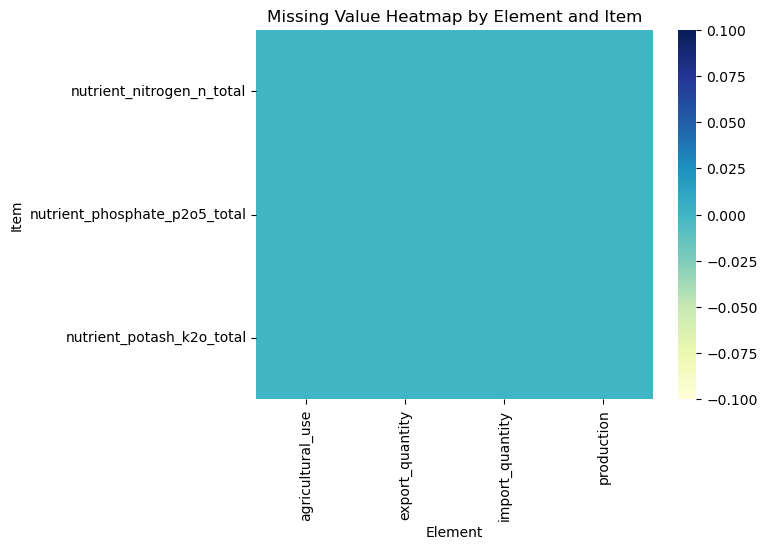

In [643]:
# create a pivot table with the Item as the index and Element as the columns
pivot_df = pd.pivot_table(df, index='Item', columns='Element', values='Value', aggfunc=lambda x: x.isnull().sum())
# create a heatmap with Element and Item
sns.heatmap(pivot_df, cmap='YlGnBu')
plt.title('Missing Value Heatmap by Element and Item')
plt.show()


In [644]:

# df = df[df['Element'] != 'production']
print(df['Element'].unique())
print(df['Item'].unique())



['production' 'import_quantity' 'export_quantity' 'agricultural_use']
['nutrient_nitrogen_n_total' 'nutrient_phosphate_p2o5_total'
 'nutrient_potash_k2o_total']


In [645]:
def splitremap(df):
    # Define the mapping of old names to new names
    item_mapping = {'nutrient_nitrogen_n_total': 'N',
                    'nutrient_phosphate_p2o5_total': 'P',
                    'nutrient_potash_k2o_total': 'K'}

    element_mapping = {'production':'prod',
                      'import_quantity': 'imp',
                       'export_quantity': 'exp',
                       'agricultural_use': 'agr'}

    df.replace({'Item': item_mapping, 'Element': element_mapping}, inplace=True)
    
    df_names = []
    combinations = df[['Element', 'Item']].drop_duplicates()
    for i, row in combinations.iterrows():
        # Get the current combination of Element and Item
        e = row['Element']
        it = row['Item']    
        # Create a DataFrame for the current combination
        df_name = f"{e}{it}_df"
        new_df = df[(df['Element'] == e) & (df['Item'] == it)].reset_index(drop=True)
        new_value_col_name = f"{e}{it}"
        new_df.rename(columns={'Value': new_value_col_name}, inplace=True)
        new_df['Key'] = new_df['Country'] + new_df['Year'].astype(str)
        new_df.drop(['Element', 'Item', 'Country', 'Year'], axis=1, inplace=True)
        new_df.set_index('Key', inplace=True)
        globals()[df_name] = new_df
        df_names.append(df_name)
    return df_names


In [646]:
splitremap(df)

['prodN_df',
 'impN_df',
 'expN_df',
 'agrN_df',
 'prodP_df',
 'impP_df',
 'expP_df',
 'agrP_df',
 'prodK_df',
 'impK_df',
 'expK_df',
 'agrK_df']

In [647]:
prodN_df.head()

,prodN
Key,
Belgium2002,790000
Belgium2003,790000
Belgium2004,840200
Belgium2005,922600
Belgium2006,958600


In [648]:
main_df = main_df.merge(prodN_df, on='Key', how='left')
main_df = main_df.merge(impN_df, on='Key', how='left')
main_df = main_df.merge(expN_df, on='Key', how='left')
main_df = main_df.merge(agrN_df, on='Key', how='left')
main_df = main_df.merge(prodP_df, on='Key', how='left')
main_df = main_df.merge(impP_df, on='Key', how='left')
main_df = main_df.merge(expP_df, on='Key', how='left')
main_df = main_df.merge(agrP_df, on='Key', how='left')
main_df = main_df.merge(prodK_df, on='Key', how='left')
main_df = main_df.merge(impK_df, on='Key', how='left')
main_df = main_df.merge(expK_df, on='Key', how='left')
main_df = main_df.merge(agrK_df, on='Key', how='left')
main_df

,Country,Year,Stock,Key,impN_x,agrN_x,impP_x,agrK_x,GL_kha,Pop1000,...,expN,agrN_y,prodP,impP_y,expP,agrP,prodK,impK,expK,agrK_y
0,Belgium,2002,2891260,Belgium2002,491700,151095,252373,77116,613.0,10355.568,...,1004595.0,151095.0,175000.0,252373.0,555844.0,43206.0,0.0,654905.0,539454.0,77116.0
1,Belgium,2002,2891260,Belgium2002,491700,151095,252373,77116,613.0,5065.038,...,1004595.0,151095.0,175000.0,252373.0,555844.0,43206.0,0.0,654905.0,539454.0,77116.0
2,Belgium,2002,2891260,Belgium2002,491700,151095,252373,77116,613.0,5290.530,...,1004595.0,151095.0,175000.0,252373.0,555844.0,43206.0,0.0,654905.0,539454.0,77116.0
3,Belgium,2002,2891260,Belgium2002,491700,151095,252373,77116,613.0,285.916,...,1004595.0,151095.0,175000.0,252373.0,555844.0,43206.0,0.0,654905.0,539454.0,77116.0
4,Belgium,2002,2891260,Belgium2002,491700,151095,252373,77116,613.0,10078.969,...,1004595.0,151095.0,175000.0,252373.0,555844.0,43206.0,0.0,654905.0,539454.0,77116.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Spain,2021,6576300,Spain2021,0,0,0,0,NaN,47486.935,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
696,Spain,2021,6576300,Spain2021,0,0,0,0,NaN,23271.722,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
697,Spain,2021,6576300,Spain2021,0,0,0,0,NaN,24215.213,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
698,Spain,2021,6576300,Spain2021,0,0,0,0,NaN,8799.411,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [649]:
# Globals loop might be cooler but not faster to code!
main_df=pd.read_csv('clean/stockkey.csv')
main_df = main_df[main_df['Year'] >= 2002]
main_df = main_df.merge(prodN_df, on='Key', how='left')
main_df = main_df.merge(impN_df, on='Key', how='left')
main_df = main_df.merge(expN_df, on='Key', how='left')
main_df = main_df.merge(agrN_df, on='Key', how='left')
main_df = main_df.merge(prodP_df, on='Key', how='left')
main_df = main_df.merge(impP_df, on='Key', how='left')
main_df = main_df.merge(expP_df, on='Key', how='left')
main_df = main_df.merge(agrP_df, on='Key', how='left')
main_df = main_df.merge(prodK_df, on='Key', how='left')
main_df = main_df.merge(impK_df, on='Key', how='left')
main_df = main_df.merge(expK_df, on='Key', how='left')
main_df = main_df.merge(agrK_df, on='Key', how='left')
# main_df = main_df.merge(prodN_df[['prodN']], on='Key', how='left').astype({'prodN': 'Int64'}) Would have been better
main_df

,Country,Year,Stock,Key,prodN,impN,expN,agrN,prodP,impP,expP,agrP,prodK,impK,expK,agrK
0,Belgium,2002,2891260,Belgium2002,790000.0,491700.0,1004595.0,151095.0,175000.0,252373.0,555844.0,43206.0,0.0,654905.0,539454.0,77116.0
1,Belgium,2003,2778077,Belgium2003,790000.0,615065.0,847098.0,153095.0,150000.0,275679.0,524077.0,43206.0,0.0,720060.0,430071.0,87116.0
2,Belgium,2004,2738648,Belgium2004,840200.0,493688.0,833786.0,146645.0,149600.0,205086.0,467455.0,49938.0,0.0,698961.0,439967.0,86733.0
3,Belgium,2005,2698649,Belgium2005,922600.0,533790.0,921698.0,144770.0,135200.0,182702.0,471883.0,49829.0,0.0,871683.0,445169.0,85612.0
4,Belgium,2006,2669076,Belgium2006,958600.0,681129.0,873053.0,139966.0,146200.0,183582.0,401756.0,47292.0,0.0,953025.0,462018.0,87124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,Spain,2017,6465747,Spain2017,727980.0,894838.0,305045.0,1079321.0,211302.0,352900.0,72194.0,436452.0,643876.0,377428.0,488821.0,389629.0
136,Spain,2018,6510590,Spain2018,754689.0,859756.0,316124.0,1033494.0,203567.0,324618.0,82620.0,425960.0,677212.0,371882.0,515268.0,414675.0
137,Spain,2019,6600330,Spain2019,754689.0,851908.0,320380.0,1011251.0,203567.0,382165.0,87004.0,479845.0,677212.0,368193.0,452798.0,369058.0
138,Spain,2020,6636430,Spain2020,754689.0,885487.0,344610.0,1059299.0,203567.0,357426.0,105962.0,486673.0,677212.0,335649.0,331854.0,399489.0


In [650]:
# Merge recast toonage values as floats -need to fix that
# Fill missing values with 0
main_df.fillna(value=0, inplace=True)

# Define integer data type dictionary
int_dtype_dict = {col: 'int32' for col in main_df.columns if col not in ['Country', 'Key']}

# Convert columns to integer data type
main_df = main_df.astype(int_dtype_dict)
main_df['Year'] = main_df['Year'].astype(str) # Dont want it drooped on correlation basis!
main_df

,Country,Year,Stock,Key,prodN,impN,expN,agrN,prodP,impP,expP,agrP,prodK,impK,expK,agrK
0,Belgium,2002,2891260,Belgium2002,790000,491700,1004595,151095,175000,252373,555844,43206,0,654905,539454,77116
1,Belgium,2003,2778077,Belgium2003,790000,615065,847098,153095,150000,275679,524077,43206,0,720060,430071,87116
2,Belgium,2004,2738648,Belgium2004,840200,493688,833786,146645,149600,205086,467455,49938,0,698961,439967,86733
3,Belgium,2005,2698649,Belgium2005,922600,533790,921698,144770,135200,182702,471883,49829,0,871683,445169,85612
4,Belgium,2006,2669076,Belgium2006,958600,681129,873053,139966,146200,183582,401756,47292,0,953025,462018,87124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,Spain,2017,6465747,Spain2017,727980,894838,305045,1079321,211302,352900,72194,436452,643876,377428,488821,389629
136,Spain,2018,6510590,Spain2018,754689,859756,316124,1033494,203567,324618,82620,425960,677212,371882,515268,414675
137,Spain,2019,6600330,Spain2019,754689,851908,320380,1011251,203567,382165,87004,479845,677212,368193,452798,369058
138,Spain,2020,6636430,Spain2020,754689,885487,344610,1059299,203567,357426,105962,486673,677212,335649,331854,399489


In [651]:
main_df.columns

Index(['Country', 'Year', 'Stock', 'Key', 'prodN', 'impN', 'expN', 'agrN',
       'prodP', 'impP', 'expP', 'agrP', 'prodK', 'impK', 'expK', 'agrK'],
      dtype='object')

In [652]:
# Calculate correlation between columns and stock
corr_df = main_df.corr()['Stock']

# Drop columns with low correlation
for col in corr_df.index:
    if abs(corr_df[col]) < 0.55:
        main_df.drop(columns=col, inplace=True)


In [653]:
corr_matrix = main_df.corr()
print(corr_matrix)


          Stock      impN      agrN      impP      agrK
Stock  1.000000  0.740607  0.854903  0.690770  0.593782
impN   0.740607  1.000000  0.807147  0.839688  0.541464
agrN   0.854903  0.807147  1.000000  0.776339  0.843595
impP   0.690770  0.839688  0.776339  1.000000  0.631581
agrK   0.593782  0.541464  0.843595  0.631581  1.000000


## Corr_matrix
Setting abs .55 as cuttoff we keep impN      agrN      impP      agrK

In [654]:
main_df.nunique()

Country      7
Year        20
Stock      140
Key        140
impN       134
agrN       132
impP       134
agrK       133
dtype: int64

In [655]:
main_df


,Country,Year,Stock,Key,impN,agrN,impP,agrK
0,Belgium,2002,2891260,Belgium2002,491700,151095,252373,77116
1,Belgium,2003,2778077,Belgium2003,615065,153095,275679,87116
2,Belgium,2004,2738648,Belgium2004,493688,146645,205086,86733
3,Belgium,2005,2698649,Belgium2005,533790,144770,182702,85612
4,Belgium,2006,2669076,Belgium2006,681129,139966,183582,87124
...,...,...,...,...,...,...,...,...
135,Spain,2017,6465747,Spain2017,894838,1079321,352900,389629
136,Spain,2018,6510590,Spain2018,859756,1033494,324618,414675
137,Spain,2019,6600330,Spain2019,851908,1011251,382165,369058
138,Spain,2020,6636430,Spain2020,885487,1059299,357426,399489


In [656]:
main_df['Year'] = main_df['Year'].astype(int)
main_df.to_csv('clean/main.csv', index=False)


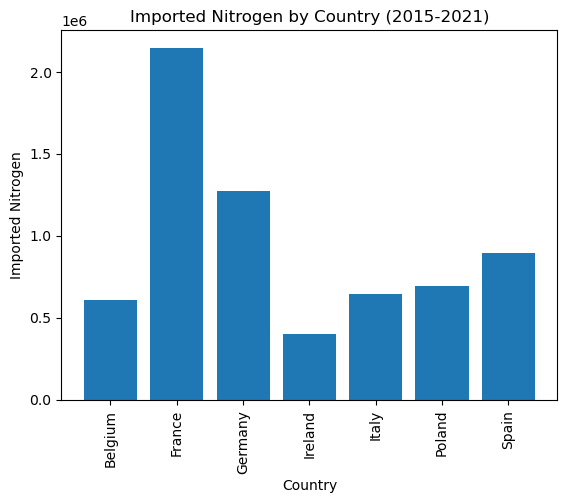

In [657]:
import matplotlib.pyplot as plt

# Filter data for year >= 2015
main_df_recent = main_df[main_df['Year'] >= 2015]

# Drop rows with NaN values
main_df_recent = main_df_recent.dropna()

# Create bar chart
plt.bar(main_df_recent['Country'], main_df_recent['impN'])

# Set x-axis labels to be vertical
plt.xticks(rotation=90)

# Add axis labels and title
plt.xlabel('Country')
plt.ylabel('Imported Nitrogen')
plt.title('Imported Nitrogen by Country (2015-2021)')

# Show plot
plt.show()






###  Taking Stock!
- We brutally culled countries based on an elbow and a lot of missing data for the Netherlands
- We look to >2001 based on missing data and farming context relevance
- We grouped 12 datasets of soil Nutrient values only to cull 8 of them based on correlation levels above .55


#### We kept

| Index | Country      |
|-------|--------------|
| 1     | France       |
| 2     | Germany      |
| 3     | Ireland      |
| 4     | Spain        |
| 5     | Italy        |
| 6     | Poland       |
| 8     | Belgium      |

#### Nutrients 

| Index | Country      |
|-------|--------------|
| 1     | impN       |
| 2     | agrN      |
| 3     | impP      |
| 4     | agrK        |

####  Further variables below


In [658]:
# os.listdir('raw')

# Set up the filters based on  prior EDA decisions
countries_to_keep=['France','Germany','Ireland','Spain','Italy','Poland','Belgium']
# elements_to_drop=['Production']
items_to_drop=['']
df = pd.read_csv('raw/land_pasture.csv')
df = df.rename(columns={'Area': 'Country'})
df = df[df['Country'].isin(countries_to_keep)]
df = df[df['Year'] >= 2002]
Unit_df=df['Unit'].unique()
df = df[['Country', 'Year', 'Element', 'Item', 'Value']]
df['Item'] = df['Item'].apply(snake)
df['Element'] = df['Element'].apply(snake)
item_df = df['Item'].unique()
element_df = df['Element'].unique()
print('Making sure all units are the same before dropping Unit columns.',Unit_df)
print(item_df)
print(element_df)
# df['Key'] = df['Country'] + df['Year'].astype(str)
df["Key"] = df["Country"] + df["Year"].astype(str)
df.head()    


# We can just add these temp and perm values and drop Element col

Making sure all units are the same before dropping Unit columns. ['1000 ha']
['land_under_temp_meadows_and_pastures'
 'land_under_perm_meadows_and_pastures']
['area']


,Country,Year,Element,Item,Value,Key
161,Belgium,2002,area,land_under_temp_meadows_and_pastures,77.0,Belgium2002
162,Belgium,2003,area,land_under_temp_meadows_and_pastures,76.0,Belgium2003
163,Belgium,2004,area,land_under_temp_meadows_and_pastures,77.0,Belgium2004
164,Belgium,2005,area,land_under_temp_meadows_and_pastures,81.0,Belgium2005
165,Belgium,2006,area,land_under_temp_meadows_and_pastures,82.0,Belgium2006


In [659]:
df.shape

(266, 6)

In [660]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266 entries, 161 to 3239
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  266 non-null    object 
 1   Year     266 non-null    int64  
 2   Element  266 non-null    object 
 3   Item     266 non-null    object 
 4   Value    266 non-null    float64
 5   Key      266 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 14.5+ KB


In [661]:
df.describe()


,Year,Value
count,266.00000,266.000000
mean,2011.00000,3250.796139
std,5.48755,3154.373596
min,2002.00000,0.000000
25%,2006.00000,500.000000
50%,2011.00000,3088.900000
75%,2016.00000,4336.000000
max,2020.00000,11533.000000


In [662]:
df['Item'].value_counts()

land_under_temp_meadows_and_pastures    133
land_under_perm_meadows_and_pastures    133
Name: Item, dtype: int64

In [663]:
df.nunique()# 

Country      7
Year        19
Element      1
Item         2
Value      235
Key        133
dtype: int64

In [664]:
df.isna().sum()

Country    0
Year       0
Element    0
Item       0
Value      0
Key        0
dtype: int64

In [665]:
df = df.fillna(0)

df.fillna(0, inplace=True)

In [666]:
df = df.groupby("Key").sum()
df = df.drop("Year", axis=1)
df['Value'] = df['Value'].astype(int)
df

,Value
Key,
Belgium2002,613
Belgium2003,612
Belgium2004,607
Belgium2005,600
Belgium2006,599
...,...
Spain2016,10363
Spain2017,10495
Spain2018,10502


In [667]:
df = df.rename(columns={"Value": "GL_kha"})
df.head()

,GL_kha
Key,
Belgium2002,613
Belgium2003,612
Belgium2004,607
Belgium2005,600
Belgium2006,599


In [668]:
main_df['Year'] = main_df['Year'].astype(int)

main_df_filtered = main_df[main_df['Year'] > 2018]

main_df_filtered # 

,Country,Year,Stock,Key,impN,agrN,impP,agrK
17,Belgium,2019,2373100,Belgium2019,568324,175025,125416,61212
18,Belgium,2020,2335440,Belgium2020,569889,175025,119397,61212
19,Belgium,2021,2310440,Belgium2021,0,0,0,0
37,France,2019,18172970,France2019,1940313,2024807,514446,405785
38,France,2020,17815670,France2020,1888108,2077726,487220,503457
39,France,2021,17330080,France2021,0,0,0,0
57,Germany,2019,11639530,Germany2019,1005404,1372084,253477,419542
58,Germany,2020,11301860,Germany2020,995901,1265477,258221,446396
59,Germany,2021,11039660,Germany2021,0,0,0,0
77,Ireland,2019,6559650,Ireland2019,341345,367364,127793,167410


In [669]:
main_df = pd.merge(main_df, df, on='Key', how='left')
main_df

,Country,Year,Stock,Key,impN,agrN,impP,agrK,GL_kha
0,Belgium,2002,2891260,Belgium2002,491700,151095,252373,77116,613.0
1,Belgium,2003,2778077,Belgium2003,615065,153095,275679,87116,612.0
2,Belgium,2004,2738648,Belgium2004,493688,146645,205086,86733,607.0
3,Belgium,2005,2698649,Belgium2005,533790,144770,182702,85612,600.0
4,Belgium,2006,2669076,Belgium2006,681129,139966,183582,87124,599.0
...,...,...,...,...,...,...,...,...,...
135,Spain,2017,6465747,Spain2017,894838,1079321,352900,389629,10495.0
136,Spain,2018,6510590,Spain2018,859756,1033494,324618,414675,10502.0
137,Spain,2019,6600330,Spain2019,851908,1011251,382165,369058,10620.0
138,Spain,2020,6636430,Spain2020,885487,1059299,357426,399489,10670.0


In [670]:
main_df.to_csv('clean/main.csv', index=False)


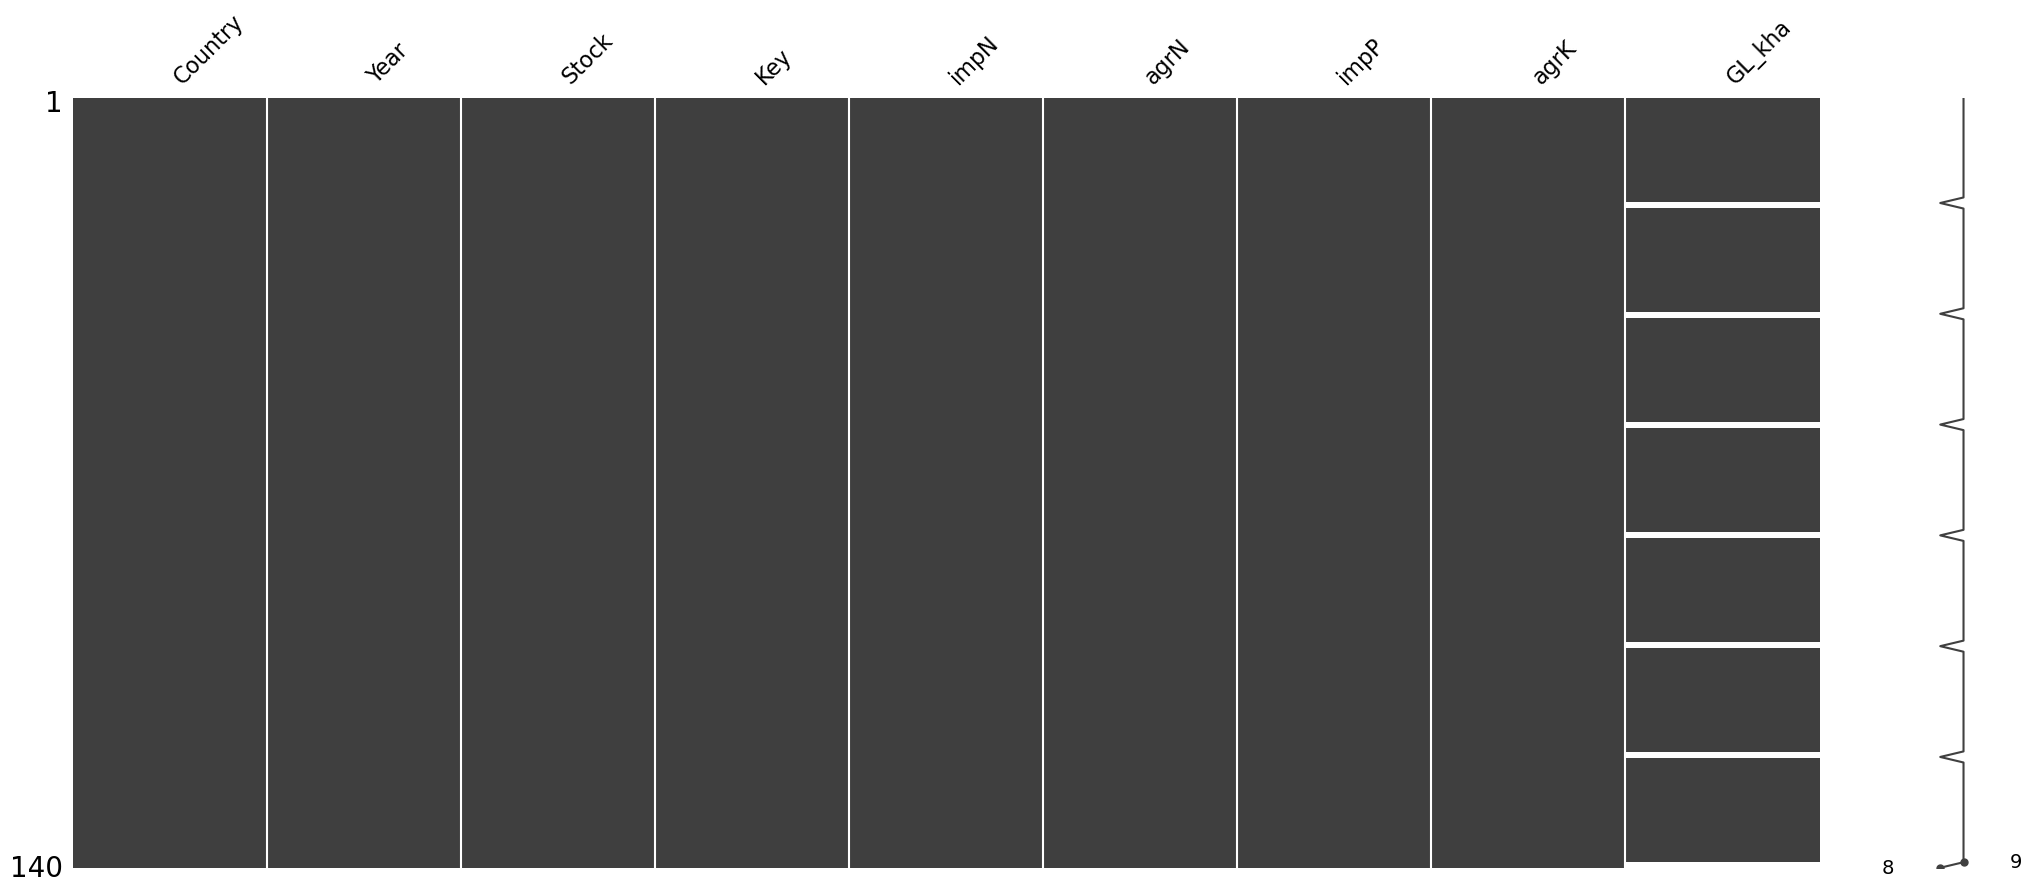

In [671]:
msno.matrix(main_df)
plt.show()

In [672]:


# main_df['GL'] = main_df['GL'].interpolate(method='linear')


In [673]:
main_2021=main_df[main_df['Year'] > 2018]    
main_2021.head(21)# Nutrient data for 2021 needs to be imputed

,Country,Year,Stock,Key,impN,agrN,impP,agrK,GL_kha
17,Belgium,2019,2373100,Belgium2019,568324,175025,125416,61212,571.0
18,Belgium,2020,2335440,Belgium2020,569889,175025,119397,61212,570.0
19,Belgium,2021,2310440,Belgium2021,0,0,0,0,NaN
37,France,2019,18172970,France2019,1940313,2024807,514446,405785,12682.0
38,France,2020,17815670,France2020,1888108,2077726,487220,503457,12740.0
39,France,2021,17330080,France2021,0,0,0,0,NaN
57,Germany,2019,11639530,Germany2019,1005404,1372084,253477,419542,7727.0
58,Germany,2020,11301860,Germany2020,995901,1265477,258221,446396,7823.0
59,Germany,2021,11039660,Germany2021,0,0,0,0,NaN
77,Ireland,2019,6559650,Ireland2019,341345,367364,127793,167410,4167.0


In [674]:

os.listdir('raw')





['.ipynb_checkpoints',
 'AnnualPopulation.csv',
 'arch',
 'beefandbuffalo.csv',
 'ConsumerPriceIndices.csv',
 'CropsAndlivestockCattleFeed.csv',
 'Deflators.csv',
 'DetailedTradeMatrix.csv',
 'DSC_7881.JPG',
 'ExchangeRates.csv',
 'FertilizersByNutrient.csv',
 'grasslands.csv',
 'LandCover.csv',
 'LandUse.csv',
 'LandUseIndicators.csv',
 'land_pasture.csv',
 'land_use_all_items_area_eu28.csv',
 'Livestock Manure.csv',
 'LivestockManure.csv',
 'LivestockPatterns.csv',
 'manure.csv',
 'ManureManagement.csv',
 'meadowsPasture.csv',
 'meat.csv',
 'nutrient.csv',
 'ProducerPrices.csv',
 'ProductionIndices.csv',
 'pr_timeseries__IRL.csv',
 'stocks.csv',
 'tas_timeseries_IRL.csv',
 'TCC-Metadata.csv',
 'temperature_change.csv',
 'temperature_sd.csv',
 'TradeIndices.csv',
 'ValueofAgricultural Production.csv',
 'yield.csv']

In [682]:
# os.listdir('raw')

# Set up the filters based on  prior EDA decisions
countries_to_keep=['France','Germany','Ireland','Spain','Italy','Poland','Belgium']
# elements_to_drop=['Production']
items_to_drop=['']
df = pd.read_csv('raw/AnnualPopulation.csv')
df['Element'] = df['Element'].apply(snake)
item_df = df['Item'].unique()
df = df.rename(columns={'Area': 'Country'})
df = df[df['Country'].isin(countries_to_keep)]
df = df[df['Year'] >= 2002]
df = df.rename(columns={"Value": "Pop1000"})
df["Key"] = df["Country"] + df["Year"].astype(str)

df.head()    

df = df[df["Element"] == "total_population_both_sexes"]
df = df[['Key' ,'Pop1000']]
df
# We can just add these temp and perm values and drop Element col

,Key,Pop1000
120,Belgium2002,10355.568
125,Belgium2003,10402.550
130,Belgium2004,10456.163
135,Belgium2005,10516.978
140,Belgium2006,10582.975
...,...,...
2945,Spain2017,46584.170
2950,Spain2018,46792.043
2955,Spain2019,47131.372
2960,Spain2020,47363.807


In [683]:
main_df = pd.merge(main_df, df, on='Key', how='left')
main_df

,Country,Year,Stock,Key,impN,agrN,impP,agrK,GL_kha,Pop1000
0,Belgium,2002,2891260,Belgium2002,491700,151095,252373,77116,613.0,10355.568
1,Belgium,2003,2778077,Belgium2003,615065,153095,275679,87116,612.0,10402.550
2,Belgium,2004,2738648,Belgium2004,493688,146645,205086,86733,607.0,10456.163
3,Belgium,2005,2698649,Belgium2005,533790,144770,182702,85612,600.0,10516.978
4,Belgium,2006,2669076,Belgium2006,681129,139966,183582,87124,599.0,10582.975
...,...,...,...,...,...,...,...,...,...,...
135,Spain,2017,6465747,Spain2017,894838,1079321,352900,389629,10495.0,46584.170
136,Spain,2018,6510590,Spain2018,859756,1033494,324618,414675,10502.0,46792.043
137,Spain,2019,6600330,Spain2019,851908,1011251,382165,369058,10620.0,47131.372
138,Spain,2020,6636430,Spain2020,885487,1059299,357426,399489,10670.0,47363.807
